In [14]:
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [16]:
data2 = pd.read_csv('/content/p5F.csv')
del data2['Unnamed: 0']
data2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
PassengerType    0
dtype: int64

In [17]:
xdata = data2.drop('Survived', axis = 1)
ydata = data2.Survived

In [18]:
xtrain, xtest, ytrain, ytest, = train_test_split(xdata, ydata, test_size = 0.3, random_state = 1)

In [19]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Akurasi DCS Tree : ", metrics.accuracy_score(ytest, ypred)*100)

# GaussianNaiveBeyes
gnb = GaussianNB()
gnb = gnb.fit(xtrain, ytrain)
ypredgnb = gnb.predict(xtest)
print("Akurasi Gaussian Naive Beyes : ", metrics.accuracy_score(ytest, ypredgnb)*100)

# Linear Discriminant Analysis
lda = LDA()
lda = lda.fit(xtrain, ytrain)
ypredlda = lda.predict(xtest)
print("Akurasi Linear Discriminant Analysis : ", metrics.accuracy_score(ytest, ypredlda)*100)

Akurasi DCS Tree :  73.78277153558052
Akurasi Gaussian Naive Beyes :  81.27340823970037
Akurasi Linear Discriminant Analysis :  83.52059925093633


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNN = KNeighborsClassifier().fit(xtrain, ytrain)
KNN_pred = KNN.predict(xtest)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(ytest, KNN_pred))

[[134  36]
 [ 58  39]]


In [24]:
pd.crosstab(ytest, KNN_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,134,36,170
1,58,39,97
All,192,75,267


In [25]:
print(classification_report(ytest, KNN_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       170
           1       0.52      0.40      0.45        97

    accuracy                           0.65       267
   macro avg       0.61      0.60      0.60       267
weighted avg       0.63      0.65      0.64       267



In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size = 14)

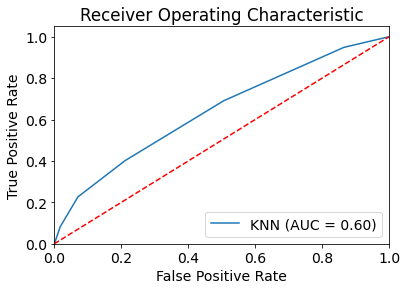

In [27]:
KNN_roc_auc = roc_auc_score(ytest, KNN.predict(xtest))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, KNN.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label = 'KNN (AUC = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

**TUGAS MAHASISWA 1**

GNB
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       170
           1       0.75      0.72      0.74        97

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



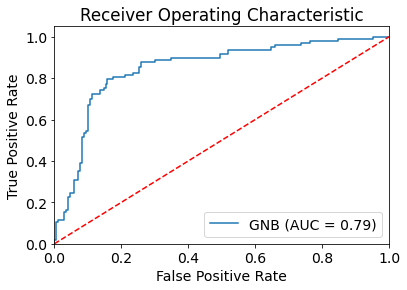

In [30]:
print("GNB")
print(classification_report(ytest, ypredgnb))

gnb_roc_auc = roc_auc_score(ytest, gnb.predict(xtest))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(ytest, gnb.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(gnb_fpr, gnb_tpr, label = 'GNB (AUC = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

LDA
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       170
           1       0.78      0.76      0.77        97

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267



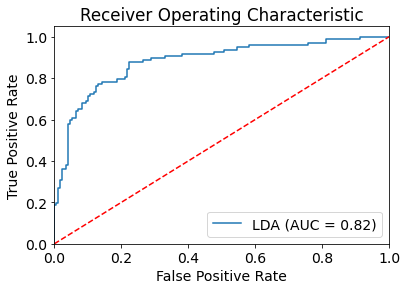

In [31]:
print("LDA")
print(classification_report(ytest, ypredlda))

lda_roc_auc = roc_auc_score(ytest, lda.predict(xtest))
lda_fpr, lda_tpr, lda_thresholds = roc_curve(ytest, lda.predict_proba(xtest)[:, 1])
plt.figure()
plt.plot(lda_fpr, lda_tpr, label = 'LDA (AUC = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

SECTION 2

In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [33]:
KNN = KNeighborsClassifier()

In [34]:
scores_accuracy = cross_val_score(KNN, xdata, ydata, cv=5, scoring='accuracy')
print(scores_accuracy)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))

[0.62359551 0.4494382  0.46892655 0.49152542 0.66101695]
Rata-rata nilai akurasi: 0.54 (+/- 0.09)


In [35]:
scores_precision = cross_val_score(KNN, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))

[0.6447619  0.48644068 0.48041237 0.50400413 0.77335329]
Rata-rata nilai precision macro: 0.58 (+/- 0.11)


In [36]:
scores_recall = cross_val_score(KNN, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))

[0.51016043 0.48716578 0.47937585 0.50418241 0.56158931]
Rata-rata nilai recall macro: 0.51 (+/- 0.03)


In [37]:
scores_f1 = cross_val_score(KNN, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.41062515 0.44832385 0.46604621 0.48955396 0.50668896]
Rata-rata nilai f1 macro: 0.46 (+/- 0.03)


**TUGAS MAHASISWA 2**

In [39]:
scores_accuracy_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='accuracy')
# print(scores_accuracy_gnb)
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_gnb.mean(), scores_accuracy_gnb.std()))

scores_precision_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='precision_macro')
# print(scores_precision_gnb)
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_gnb.mean(), scores_precision_gnb.std()))

scores_recall_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='recall_macro')
# print(scores_recall_gnb)
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_gnb.mean(), scores_recall_gnb.std()))

scores_f1_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='f1_macro')
# print(scores_f1_gnb)
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_gnb.mean(), scores_f1_gnb.std()))

Rata-rata nilai akurasi: 0.80 (+/- 0.02)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)


In [40]:
scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

Rata-rata nilai akurasi: 0.80 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.78 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)
